In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Salary_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avaerage_salary,company_txt,job_location,age,python_yn,rstudio,spark_yn,aws_yn,excel_yn
0,Nextracker - Data Scientist/Machine Learning E...,$79k-$128k (Glassdoor Est.),*CURRENT EMPLOYEES :\r\nPlease click here to b...,3.8,Flex\r\n3.8,"Fremont, CA",-1,10000+ Employees,1969,Company - Public,...,128,103.5,Flex\r\n,Fremont,51,1,0,0,0,1
1,Senior Data Scientist,$140k-$225k (Glassdoor Est.),Formation provides personalization for the lar...,2.9,Formation\r\n2.9,"San Francisco, CA",-1,51 to 200 Employees,2015,Company - Private,...,225,182.5,Formation\r\n,San Francisco,5,1,0,1,1,1
2,"Data Scientist, Analytics",$119k-$191k (Glassdoor Est.),About the team:\r\n\r\n\r\nThe Evernote Analyt...,4.2,Evernote\r\n4.2,"Redwood City, CA",-1,201 to 500 Employees,2008,Company - Private,...,191,155.0,Evernote\r\n,Redwood City,12,1,0,0,0,1
3,Data Scientist,$100k-$161k (Glassdoor Est.),Grammarly is continuing to grow our team durin...,5.0,Grammarly\r\n5.0,"San Francisco, CA",-1,201 to 500 Employees,2009,Company - Private,...,161,130.5,Grammarly\r\n,San Francisco,11,1,0,0,0,1
4,"Full Stack Data Scientist, Supply DS",$115k-$184k (Glassdoor Est.),Company Description\r\n\r\nWish is a mobile e-...,3.5,Wish\r\n3.5,"San Francisco, CA",-1,501 to 1000 Employees,2011,Company - Private,...,184,149.5,Wish\r\n,San Francisco,9,1,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avaerage_salary', 'company_txt', 'job_location', 'age', 'python_yn',
       'rstudio', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'
    

In [6]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    70
Name: job_simp, dtype: int64

In [8]:
df['Seniority']=df['Job Title'].apply(seniority)

In [9]:
df.Seniority.value_counts()

na        57
senior    12
junior     1
Name: Seniority, dtype: int64

In [10]:
df['desc_len']=df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     5796
1     4086
2     3058
3     4931
4     3200
      ... 
65    2228
66    4340
67    1911
68    3349
69    4163
Name: desc_len, Length: 70, dtype: int64

0    -1
1    -1
2    -1
3    -1
4    -1
     ..
65   -1
66   -1
67   -1
68   -1
69   -1
Name: Competitors, Length: 70, dtype: int64

In [11]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary,axis=1)


In [12]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary


In [13]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.min_salary,axis=1)

In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avaerage_salary', 'company_txt', 'job_location', 'age', 'python_yn',
       'rstudio', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'Seniority',
       'desc_len'],
      dtype='object')

In [15]:
df.company_txt

0          Flex\r\n
1     Formation\r\n
2      Evernote\r\n
3     Grammarly\r\n
4          Wish\r\n
          ...      
65        Bayer\r\n
66     Facebook\r\n
67    Pinterest\r\n
68     Facebook\r\n
69       Square\r\n
Name: company_txt, Length: 70, dtype: object

In [16]:
df['company_txt']=df.company_txt.apply(lambda x: x[0:-3])

# instaed of location we can replace by space also

In [17]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avaerage_salary,age,python_yn,rstudio,spark_yn,aws_yn,excel_yn,desc_len
count,70.000000,70.0,70.000000,70.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000
mean,4.051429,-1.0,1938.657143,-1.0,0.0,0.0,114.714286,114.714286,147.935714,23.571429,0.914286,0.0,0.228571,0.157143,0.342857,3648.257143
std,0.453886,0.0,336.856908,0.0,0.0,0.0,20.265014,20.265014,26.151582,35.098442,0.281963,0.0,0.422944,0.366563,0.478091,997.646894
min,2.900000,-1.0,-1.000000,-1.0,0.0,0.0,72.000000,72.000000,94.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1202.000000
25%,3.725000,-1.0,2000.750000,-1.0,0.0,0.0,103.750000,103.750000,131.000000,8.000000,1.000000,0.0,0.000000,0.000000,0.000000,2916.500000
50%,4.000000,-1.0,2009.000000,-1.0,0.0,0.0,115.000000,115.000000,149.000000,11.000000,1.000000,0.0,0.000000,0.000000,0.000000,3876.000000
75%,4.500000,-1.0,2011.750000,-1.0,0.0,0.0,126.000000,126.000000,162.000000,17.000000,1.000000,0.0,0.000000,0.000000,1.000000,4319.000000
max,5.000000,-1.0,2016.000000,-1.0,0.0,0.0,165.000000,165.000000,211.500000,167.000000,1.000000,0.0,1.000000,1.000000,1.000000,5796.000000


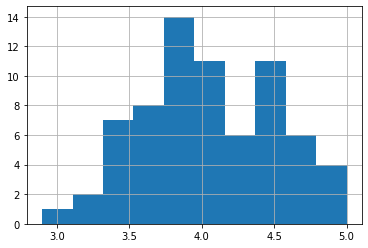

In [18]:
df.Rating.hist()

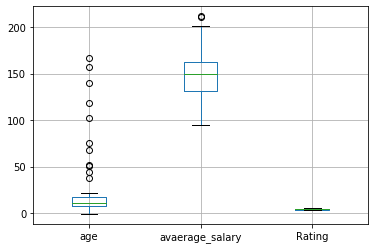

In [19]:
df.boxplot(column=['age','avaerage_salary','Rating'])

In [20]:
df[['age','avaerage_salary','Rating','desc_len']].corr()

,age,avaerage_salary,Rating,desc_len
age,1.000000,-0.302973,-0.041445,0.088631
avaerage_salary,-0.302973,1.000000,-0.137016,-0.184371
Rating,-0.041445,-0.137016,1.000000,0.062100
desc_len,0.088631,-0.184371,0.062100,1.000000


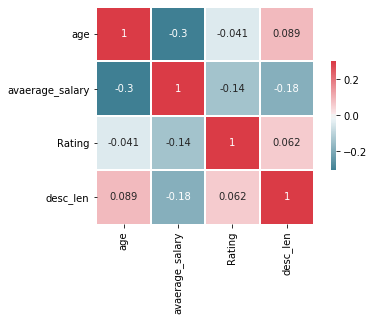

In [21]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avaerage_salary','Rating','desc_len']].corr(),cmap=cmap,vmax=0.3,square=True,linewidths=0.8,cbar_kws={"shrink":0.5},annot=True)

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avaerage_salary', 'company_txt', 'job_location', 'age', 'python_yn',
       'rstudio', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'Seniority',
       'desc_len'],
      dtype='object')

In [23]:
df['spark_yn']

0     0
1     1
2     0
3     0
4     0
     ..
65    0
66    0
67    0
68    0
69    0
Name: spark_yn, Length: 70, dtype: int64

In [24]:
df_cat=df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','Revenue','company_txt','job_location','job_simp', 'Seniority']]

In [25]:
df_cat.Location.value_counts()

San Francisco, CA    44
Mountain View, CA     5
Palo Alto, CA         5
Menlo Park, CA        2
Redwood City, CA      2
Santa Clara, CA       2
Fremont, CA           2
San Mateo, CA         2
San Jose, CA          2
Livermore, CA         1
Oakland, CA           1
San Carlos, CA        1
Emeryville, CA        1
Name: Location, dtype: int64

graph for Location : total=13


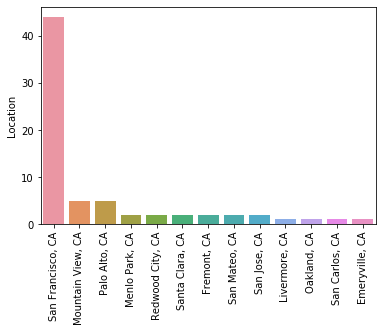

graph for Headquarters : total=1


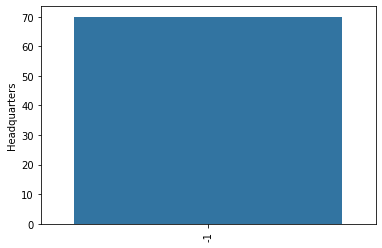

graph for Size : total=8


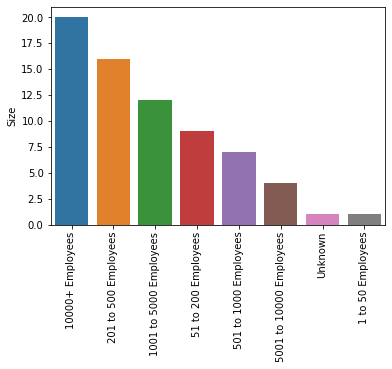

graph for Type of ownership : total=5


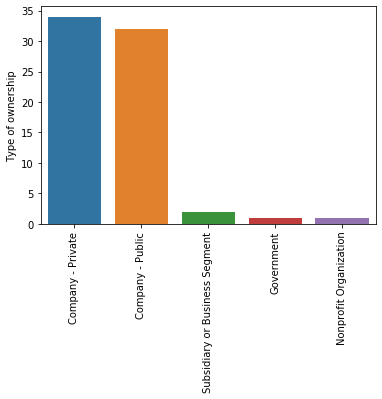

graph for Industry : total=14


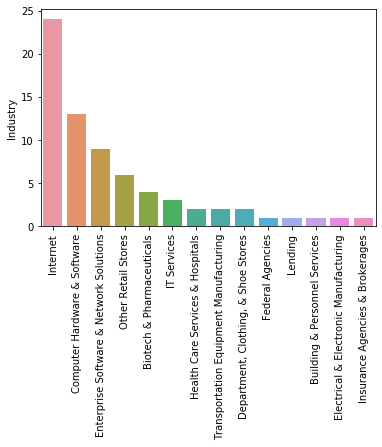

graph for Sector : total=9


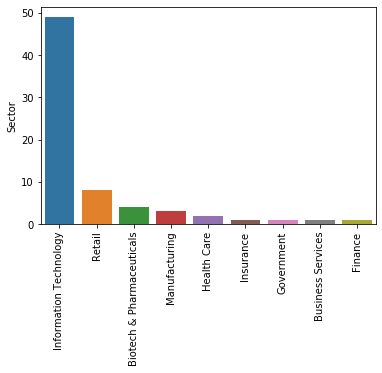

graph for Revenue : total=13


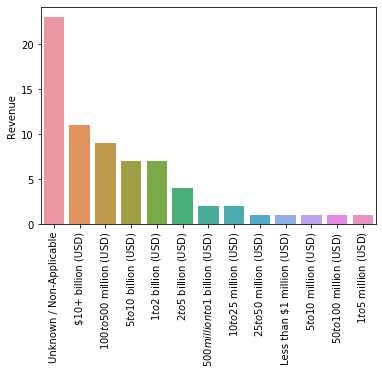

graph for company_txt : total=54


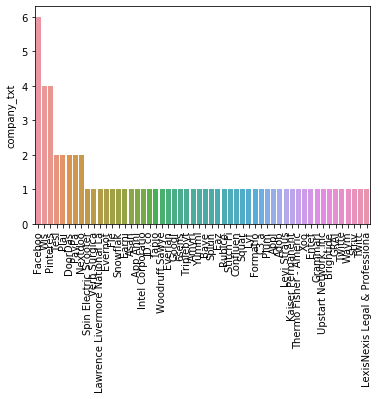

graph for job_location : total=13


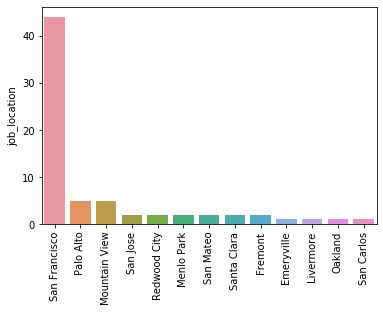

graph for job_simp : total=1


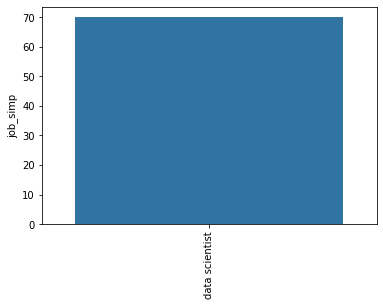

graph for Seniority : total=3


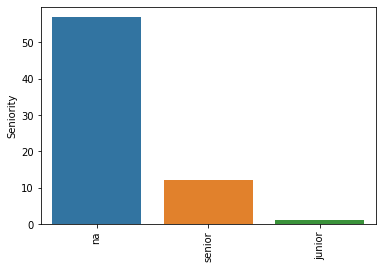

In [26]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for %s : total=%d" %(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for company_txt : total=20


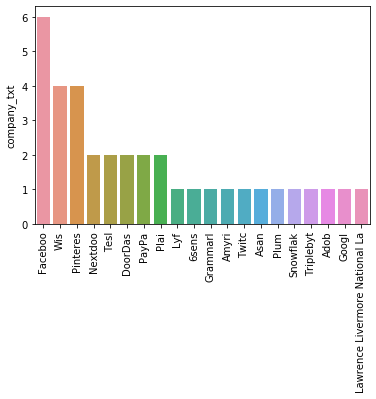

graph for job_location : total=13


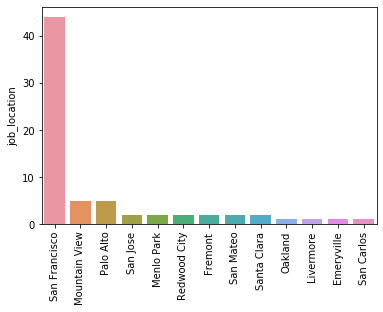

In [50]:
for i in df_cat[['company_txt','job_location']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s : total=%d" %(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avaerage_salary', 'company_txt', 'job_location', 'age', 'python_yn',
       'rstudio', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'Seniority',
       'desc_len'],
      dtype='object')

In [28]:
pd.pivot_table(df, index='job_simp',values='avaerage_salary')

,avaerage_salary
job_simp,
data scientist,147.935714


In [29]:
pd.pivot_table(df, index=['job_simp','Seniority'],values='avaerage_salary')

avaerage_salary
job_simp       Seniority                 
data scientist junior           94.500000
               na              145.070175
               senior          166.000000

In [30]:
pd.pivot_table(df, index='job_location',values='avaerage_salary')

,avaerage_salary
job_location,
Emeryville,164.500
Fremont,114.750
Livermore,115.000
Menlo Park,182.250
Mountain View,140.600
Oakland,149.000
Palo Alto,134.400
Redwood City,150.000
San Carlos,201.500


In [31]:
pd.pivot_table(df, index='job_location',values='avaerage_salary').sort_values('avaerage_salary',ascending=False)

,avaerage_salary
job_location,
San Carlos,201.500
Menlo Park,182.250
Emeryville,164.500
San Mateo,160.750
Redwood City,150.000
San Francisco,149.375
Oakland,149.000
Santa Clara,148.500
Mountain View,140.600


In [32]:
pd.pivot_table(df, index='job_location',values='avaerage_salary',aggfunc='count').sort_values('avaerage_salary',ascending=False)

,avaerage_salary
job_location,
San Francisco,44
Mountain View,5
Palo Alto,5
Fremont,2
Menlo Park,2
Redwood City,2
San Jose,2
San Mateo,2
Santa Clara,2


In [33]:
#to display all rows if we have more in results

pd.set_option('display.max_columns',None)

In [34]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avaerage_salary,company_txt,job_location,age,python_yn,rstudio,spark_yn,aws_yn,excel_yn,job_simp,Seniority,desc_len
0,Nextracker - Data Scientist/Machine Learning E...,$79k-$128k (Glassdoor Est.),*CURRENT EMPLOYEES :\r\nPlease click here to b...,3.8,Flex\r\n3.8,"Fremont, CA",-1,10000+ Employees,1969,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,79,79,103.5,Fle,Fremont,51,1,0,0,0,1,data scientist,na,5796
1,Senior Data Scientist,$140k-$225k (Glassdoor Est.),Formation provides personalization for the lar...,2.9,Formation\r\n2.9,"San Francisco, CA",-1,51 to 200 Employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,0,140,140,182.5,Formatio,San Francisco,5,1,0,1,1,1,data scientist,senior,4086
2,"Data Scientist, Analytics",$119k-$191k (Glassdoor Est.),About the team:\r\n\r\n\r\nThe Evernote Analyt...,4.2,Evernote\r\n4.2,"Redwood City, CA",-1,201 to 500 Employees,2008,Company - Private,Computer Hardware & Software,Information Technology,$50 to $100 million (USD),-1,0,0,119,119,155.0,Evernot,Redwood City,12,1,0,0,0,1,data scientist,na,3058
3,Data Scientist,$100k-$161k (Glassdoor Est.),Grammarly is continuing to grow our team durin...,5.0,Grammarly\r\n5.0,"San Francisco, CA",-1,201 to 500 Employees,2009,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,0,0,100,100,130.5,Grammarl,San Francisco,11,1,0,0,0,1,data scientist,na,4931
4,"Full Stack Data Scientist, Supply DS",$115k-$184k (Glassdoor Est.),Company Description\r\n\r\nWish is a mobile e-...,3.5,Wish\r\n3.5,"San Francisco, CA",-1,501 to 1000 Employees,2011,Company - Private,Other Retail Stores,Retail,$1 to $2 billion (USD),-1,0,0,115,115,149.5,Wis,San Francisco,9,1,0,0,0,0,data scientist,na,3200


In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avaerage_salary', 'company_txt', 'job_location', 'age', 'python_yn',
       'rstudio', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'Seniority',
       'desc_len'],
      dtype='object')

In [36]:
df_pivot=df[['Rating','Industry','Sector', 'Revenue','hourly','employer_provided','python_yn',
       'rstudio', 'spark_yn', 'aws_yn', 'excel_yn','Type of ownership','avaerage_salary']]

In [37]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot,index=i,values='avaerage_salary').sort_values(i,ascending=False))
    #pd.pivot_table(df_pivot,index=i,values='avaerage_salary')

Rating
        avaerage_salary
Rating                 
5.0          130.500000
4.9          133.250000
4.8          201.500000
4.7          147.666667
4.6          132.833333
4.5          152.277778
4.4          154.000000
4.3          125.333333
4.2          159.166667
4.1          150.875000
4.0          139.071429
3.9          137.937500
3.8          148.250000
3.7          154.500000
3.6          140.500000
3.5          164.416667
3.4          182.500000
3.3          111.000000
3.2          185.000000
2.9          182.500000
Industry
                                         avaerage_salary
Industry                                                
Transportation Equipment Manufacturing        125.750000
Other Retail Stores                           169.083333
Lending                                       148.000000
Internet                                      152.979167
Insurance Agencies & Brokerages               138.500000
IT Services                                   125.166667


ValueError: Grouper for 'avaerage_salary' not 1-dimensional

In [38]:
pd.pivot_table(df_pivot,index='Revenue',columns='python_yn',values='avaerage_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),NaN,7.0
$1 to $5 million (USD),NaN,1.0
$10 to $25 million (USD),NaN,2.0
$10+ billion (USD),2.0,9.0
$100 to $500 million (USD),1.0,8.0
$2 to $5 billion (USD),1.0,3.0
$25 to $50 million (USD),NaN,1.0
$5 to $10 billion (USD),NaN,7.0
$5 to $10 million (USD),NaN,1.0


In [83]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

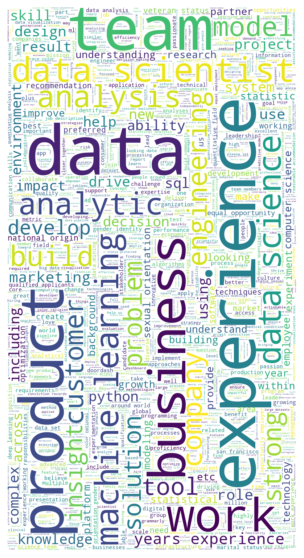

In [91]:
word=" ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered=[]
    stop_words=set(stopwords.words('english'))
    word_taken=word_tokenize(text)
    for w in word_taken:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered= punctuation_stop(word)
text = " ".join([ele for ele in words_filtered])
wc=WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)


plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
data_out=dataset.drop(['Index'],axis=1)
data_out.to_csv('EDA_cleaned.csv',index=False)

NameError: name 'dataset' is not defined